In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [7]:
data = pd.read_csv(r'C:\Users\Jagadevi\Downloads\Dataset11-Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


SIze of the Data

In [11]:
data.shape

(8784, 8)

In [13]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [15]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Type of Weather

In [20]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [22]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [24]:
data.Weather.nunique()

50

Converting the Weather Categoris into Standard Categories:

In [65]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [67]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [69]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [71]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list


def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
         return 'SNOW+RAIN'
    elif 'Snow' in list1:
         return 'SNOW'
    elif 'Rain' in list1:
         return 'RAIN'
    elif 'Fog' in list1:
         return 'FOG' 
    elif 'Clear' in list1:
         return 'Clear'
    elif 'Cloudy' in list1:
         return 'Cloudy'
    else:
        return 'RAIN'

In [73]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [75]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [77]:
data['Std_Weather']= data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [79]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [81]:
data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

Sample selection and data balancing:

In [103]:
cloudy_df = data[data['Std_Weather'] == 'Cloudy'].sample(600)
#cloudy_df

In [92]:
clear_df = data[data['Std_Weather'] == 'Clear'].sample(600)
clear_df.shape

(600, 9)

Dataset Balancing

In [95]:
#cloudy_df = data[data['Std_Weather'] == 'Cloudy'].sample(600)
#clear_df = data[data['Std_Weather'] == 'Clear'].sample(600)
rain_df = data[data['Std_Weather'] == 'RAIN']
snow_df = data[data['Std_Weather'] == 'SNOW']

In [97]:
rain_df.shape

(603, 9)

In [99]:
snow_df.shape

(556, 9)

Create New Weather Dataset:

In [106]:
weather_df = pd.concat([cloudy_df_sample, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
82,1/4/2012 10:00,-15.2,-20.6,63,7,24.1,101.54,Mostly Cloudy,Cloudy
5889,9/2/2012 9:00,19.1,11.5,61,4,48.3,101.52,Mostly Cloudy,Cloudy
3553,5/28/2012 1:00,17.4,8.8,57,13,25.0,101.23,Mostly Cloudy,Cloudy
2308,4/6/2012 4:00,1.1,-8.3,49,17,25.0,101.13,Mostly Cloudy,Cloudy
1367,2/26/2012 23:00,-9.5,-16.2,58,0,25.0,102.64,Cloudy,Cloudy


In [108]:
weather_df.shape

(2359, 9)

In [112]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

Drop columns date & Weather

In [115]:
weather_df.drop(columns = ['Date/Time', 'Weather'], axis =1, inplace = True)

In [117]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
82,-15.2,-20.6,63,7,24.1,101.54,Cloudy
5889,19.1,11.5,61,4,48.3,101.52,Cloudy
3553,17.4,8.8,57,13,25.0,101.23,Cloudy
2308,1.1,-8.3,49,17,25.0,101.13,Cloudy
1367,-9.5,-16.2,58,0,25.0,102.64,Cloudy



Duplicate Records:

In [122]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather



Null/Missing values:

In [125]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [127]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object


Data Visualizations:

In [130]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.728953,1.494277,71.721916,16.692242,23.420220,100.799254
std,11.334397,10.447554,16.516263,9.180422,12.936446,0.919775
min,-23.200000,-28.500000,20.000000,0.000000,0.600000,97.520000
25%,-2.750000,-6.800000,61.000000,9.000000,16.100000,100.290000
50%,5.300000,0.300000,75.000000,17.000000,24.100000,100.800000
75%,16.450000,10.400000,85.000000,22.000000,25.000000,101.390000
max,32.600000,24.400000,99.000000,57.000000,48.300000,103.650000



Correlation among the features:

In [141]:
cols = ['Temp_C','Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
        'Visibility_km','Press_kPa']

In [143]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.936253,-0.260045,-0.153154,0.397288,-0.070828
Dew Point Temp_C,0.936253,1.000000,0.089489,-0.138283,0.177683,-0.190867
Rel Hum_%,-0.260045,0.089489,1.000000,0.059978,-0.662326,-0.344957
Wind Speed_km/h,-0.153154,-0.138283,0.059978,1.000000,-0.162750,-0.391957
Visibility_km,0.397288,0.177683,-0.662326,-0.162750,1.000000,0.328109
Press_kPa,-0.070828,-0.190867,-0.344957,-0.391957,0.328109,1.000000



Heat map:

<Axes: >

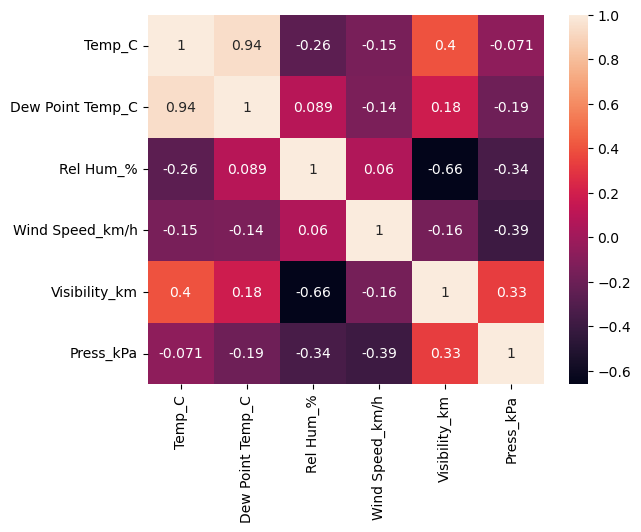

In [146]:
sns.heatmap(cor_matrix, annot = True)

In [148]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

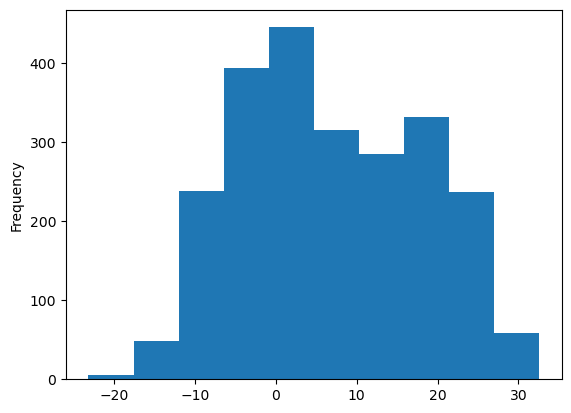

In [150]:
weather_df['Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

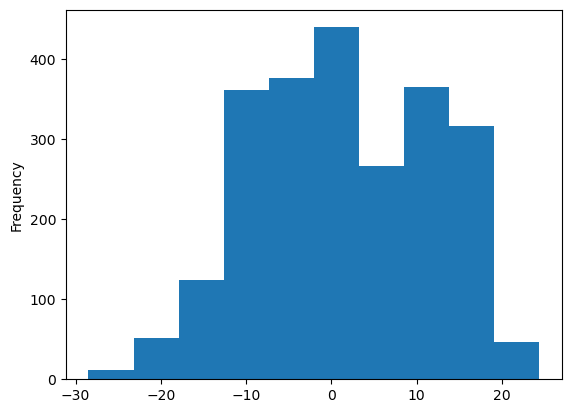

In [152]:
weather_df['Dew Point Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

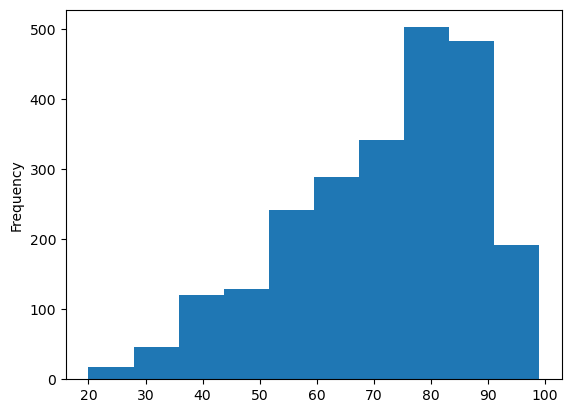

In [156]:
weather_df['Rel Hum_%'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

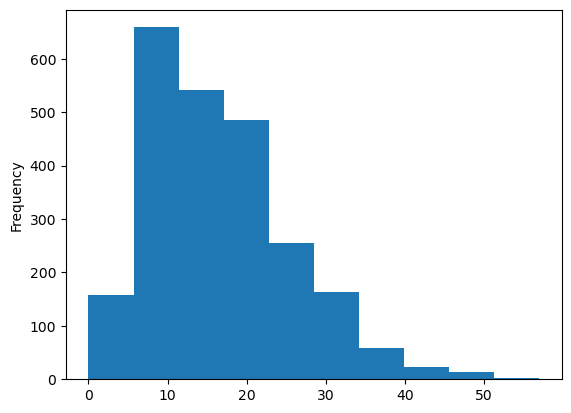

In [158]:
weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

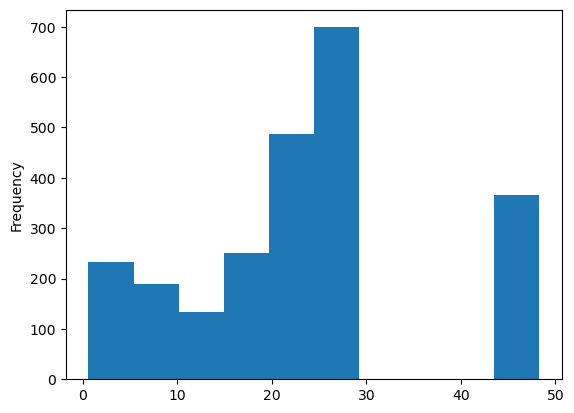

In [160]:
weather_df['Visibility_km'].plot(kind = 'hist')

<Axes: >

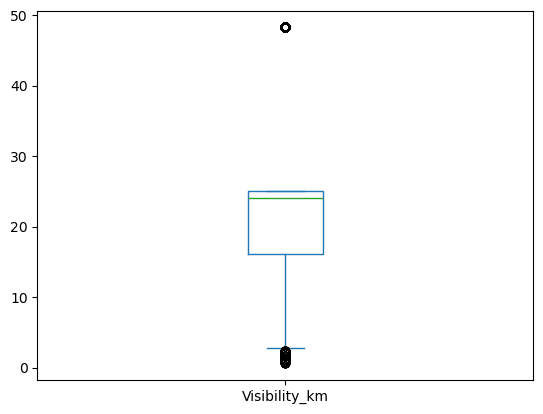

In [162]:
weather_df['Visibility_km'].plot(kind = 'box')

<Axes: >

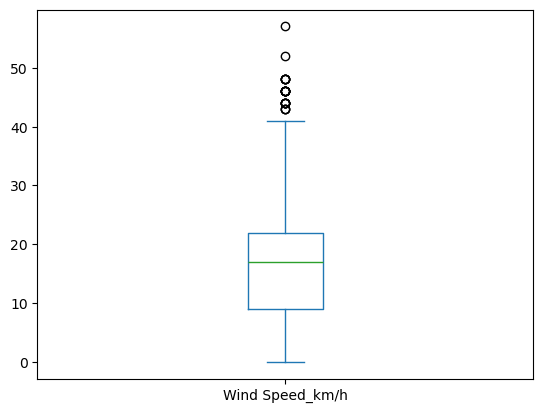

In [164]:
weather_df['Wind Speed_km/h'].plot(kind = 'box')

In [166]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
82,-15.2,-20.6,63,7,24.1,101.54,Cloudy
5889,19.1,11.5,61,4,48.3,101.52,Cloudy
3553,17.4,8.8,57,13,25.0,101.23,Cloudy
2308,1.1,-8.3,49,17,25.0,101.13,Cloudy
1367,-9.5,-16.2,58,0,25.0,102.64,Cloudy


In [168]:
from sklearn.preprocessing import LabelEncoder

In [170]:
label_Encoder = LabelEncoder()

In [172]:
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [174]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [178]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
82,-15.2,-20.6,63,7,24.1,101.54,1
5889,19.1,11.5,61,4,48.3,101.52,1
3553,17.4,8.8,57,13,25.0,101.23,1
2308,1.1,-8.3,49,17,25.0,101.13,1
1367,-9.5,-16.2,58,0,25.0,102.64,1


In [180]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

In [182]:
#Independent variable
X= weather_df.drop(['Std_Weather'], axis = 1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
82,-15.2,-20.6,63,7,24.1,101.54
5889,19.1,11.5,61,4,48.3,101.52
3553,17.4,8.8,57,13,25.0,101.23
2308,1.1,-8.3,49,17,25.0,101.13
1367,-9.5,-16.2,58,0,25.0,102.64
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [184]:
#Target Variable:
y = weather_df['Std_Weather']
y

82      1
5889    1
3553    1
2308    1
1367    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32


Feature Scalling:

In [187]:
from sklearn.preprocessing import StandardScaler

In [191]:
std_scaler = StandardScaler()

In [195]:
X_std = std_scaler.fit_transform(X)
X_std

array([[-1.93513624, -2.11522825, -0.52819246, -1.0559752 ,  0.05255877,
         0.80552642],
       [ 1.09169195,  0.95791264, -0.6493109 , -1.38282687,  1.92363922,
         0.78377736],
       [ 0.94167423,  0.69942415, -0.89154779, -0.40227187,  0.12214441,
         0.46841604],
       ...,
       [-0.63792416, -0.28666155,  1.28858422,  1.23198646, -1.43966655,
        -0.92352358],
       [-0.61145044, -0.31538249,  1.04634733,  1.23198646, -1.06081142,
        -0.96702169],
       [-0.5938013 , -0.34410344,  0.86466966,  1.44988757, -0.93710362,
        -0.98877075]])


Splitting Data into Training and Testing:

In [198]:
from sklearn.model_selection import train_test_split

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.2, random_state = 42)

In [204]:
x_train.shape, x_test.shape

((1887, 6), (472, 6))


Model Builiding:

In [209]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()


Model Training

In [212]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()


Model Predictions:

In [215]:
y_pred_dt = decision_tree_model.predict(x_test)


Model Evaluations:

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Accuracy:

In [224]:
accuracy_score(y_test, y_pred_dt)

0.6038135593220338


Classification Report:

In [227]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       118
           1       0.47      0.45      0.46       128
           2       0.65      0.71      0.68       126
           3       0.74      0.78      0.76       100

    accuracy                           0.60       472
   macro avg       0.61      0.61      0.61       472
weighted avg       0.60      0.60      0.60       472




Confusion matrix:

<Axes: >

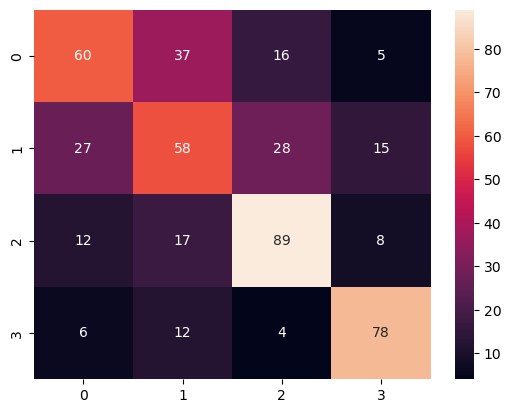

In [232]:
cm = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm,annot = True, fmt = 'd')



Building multiple models : Best model:

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [251]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [253]:
model_list = [dt_model,rf_model,svc_model,knn_model,lr_model,nb_model]

In [257]:
acc_list = []
for model in model_list:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [259]:
acc_list

[0.6186440677966102,
 0.6567796610169492,
 0.6016949152542372,
 0.6165254237288136,
 0.5932203389830508,
 0.5805084745762712]

In [261]:
model_df = pd.DataFrame({'Model':model_list, "Accuracy": acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.618644
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.656780
2,SVC(),0.601695
3,KNeighborsClassifier(),0.616525
4,LogisticRegression(),0.593220
5,GaussianNB(),0.580508



K-fold cross Validation:

In [264]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rf_model,X_std,y,cv = 5, scoring ='accuracy')
print('Cross-validation scores =',scores)

Cross-validation scores = [0.58686441 0.64618644 0.58474576 0.5720339  0.68789809]


In [266]:
scores.mean()

0.6155457195293101



Hyperparameter tunning: Model tunning:

In [271]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [275]:
parameters = {
    'n_estimators' :[50,100],
    'max_features':['sqrt','log2',None]
}

In [277]:
grid_search = GridSearchCV(estimator = rf_model,
                           param_grid = parameters)

In [279]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})



Best Hyper Parameters:

In [282]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [294]:
Random_forest_model_new = RandomForestClassifier(max_features= 'log2', n_estimators =50)

In [296]:
Random_forest_model_new.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

In [306]:
y_pred_rf = Random_forest_model_new.predict(x_test)

In [308]:
accuracy_score(y_test, y_pred_rf)

0.6483050847457628

In [310]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new,X_std,y,cv = 5, scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.55084746 0.62711864 0.58050847 0.60381356 0.68152866]


In [312]:
scores.mean()

0.6087633596027204